In [3]:
import pandas as pd
import numpy as np

# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-01-31')

# Create a DataFrame with random stock prices for three companies
np.random.seed(42)
data = {
    'date': date_range.tolist() * 3,
    'company': ['CompanyA']*31 + ['CompanyB']*31 + ['CompanyC']*31,
    'price': np.random.normal(loc=100, scale=10, size=31).tolist() +
             np.random.normal(loc=200, scale=20, size=31).tolist() +
             np.random.normal(loc=300, scale=30, size=31).tolist()
}

df = pd.DataFrame(data)
print(df)


         date   company       price
0  2023-01-01  CompanyA  104.967142
1  2023-01-02  CompanyA   98.617357
2  2023-01-03  CompanyA  106.476885
3  2023-01-04  CompanyA  115.230299
4  2023-01-05  CompanyA   97.658466
..        ...       ...         ...
88 2023-01-27  CompanyC  284.107194
89 2023-01-28  CompanyC  315.398023
90 2023-01-29  CompanyC  302.912326
91 2023-01-30  CompanyC  329.059350
92 2023-01-31  CompanyC  278.938407

[93 rows x 3 columns]


**1.Convert a column to datetime:**

In [4]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)


date       datetime64[ns]
company            object
price             float64
dtype: object


**2. Set a datetime column as the index:**

In [6]:
df.set_index('date', inplace=True)
print(df.head())


             company       price
date                            
2023-01-01  CompanyA  104.967142
2023-01-02  CompanyA   98.617357
2023-01-03  CompanyA  106.476885
2023-01-04  CompanyA  115.230299
2023-01-05  CompanyA   97.658466


**3. Resample the time series data to a different frequency:**

In [ ]:
monthly_avg = df.resample('M').mean()
print(monthly_avg)


**4. Calculate the rolling mean:**

In [8]:
df['rolling_mean'] = df['price'].rolling(window=7).mean()
print(df.head(15))


             company       price  rolling_mean
date                                          
2023-01-01  CompanyA  104.967142           NaN
2023-01-02  CompanyA   98.617357           NaN
2023-01-03  CompanyA  106.476885           NaN
2023-01-04  CompanyA  115.230299           NaN
2023-01-05  CompanyA   97.658466           NaN
2023-01-06  CompanyA   97.658630           NaN
2023-01-07  CompanyA  115.792128    105.200130
2023-01-08  CompanyA  107.674347    105.586873
2023-01-09  CompanyA   95.305256    105.113716
2023-01-10  CompanyA  105.425600    104.963532
2023-01-11  CompanyA   95.365823    102.125750
2023-01-12  CompanyA   95.342702    101.794927
2023-01-13  CompanyA  102.419623    102.475069
2023-01-14  CompanyA   80.867198     97.485793
2023-01-15  CompanyA   82.750822     93.925289


**5. Calculate the rolling sum:**

In [9]:
df['rolling_sum'] = df['price'].rolling(window=7).sum()
print(df.head(15))


             company       price  rolling_mean  rolling_sum
date                                                       
2023-01-01  CompanyA  104.967142           NaN          NaN
2023-01-02  CompanyA   98.617357           NaN          NaN
2023-01-03  CompanyA  106.476885           NaN          NaN
2023-01-04  CompanyA  115.230299           NaN          NaN
2023-01-05  CompanyA   97.658466           NaN          NaN
2023-01-06  CompanyA   97.658630           NaN          NaN
2023-01-07  CompanyA  115.792128    105.200130   736.400907
2023-01-08  CompanyA  107.674347    105.586873   739.108113
2023-01-09  CompanyA   95.305256    105.113716   735.796012
2023-01-10  CompanyA  105.425600    104.963532   734.744727
2023-01-11  CompanyA   95.365823    102.125750   714.880252
2023-01-12  CompanyA   95.342702    101.794927   712.564488
2023-01-13  CompanyA  102.419623    102.475069   717.325480
2023-01-14  CompanyA   80.867198     97.485793   682.400550
2023-01-15  CompanyA   82.750822     93.

**6. Calculate the cumulative sum:**

In [10]:
df['cumulative_sum'] = df['price'].cumsum()
print(df.head())


             company       price  rolling_mean  rolling_sum  cumulative_sum
date                                                                       
2023-01-01  CompanyA  104.967142           NaN          NaN      104.967142
2023-01-02  CompanyA   98.617357           NaN          NaN      203.584499
2023-01-03  CompanyA  106.476885           NaN          NaN      310.061384
2023-01-04  CompanyA  115.230299           NaN          NaN      425.291682
2023-01-05  CompanyA   97.658466           NaN          NaN      522.950149


**7. Plot a time series data:**

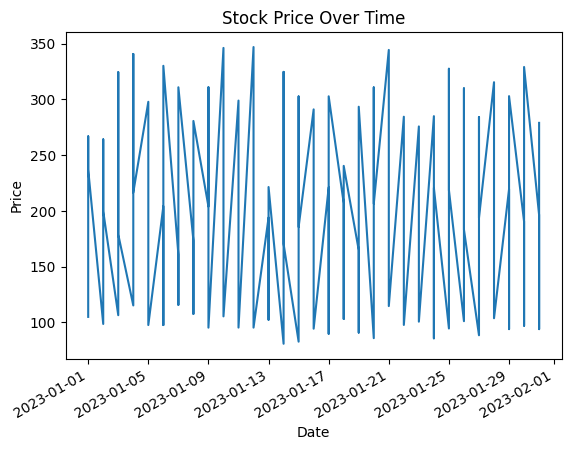

In [11]:
import matplotlib.pyplot as plt
df['price'].plot(title='Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


**8. Handle missing dates in time series:**

In [ ]:
df_asfreq = df.asfreq('D').fillna(method='ffill')
print(df_asfreq.head(15))


**9. Shift the time series data:**

In [13]:
df['price_shifted'] = df['price'].shift(1)
print(df.head())


             company       price  rolling_mean  rolling_sum  cumulative_sum  \
date                                                                          
2023-01-01  CompanyA  104.967142           NaN          NaN      104.967142   
2023-01-02  CompanyA   98.617357           NaN          NaN      203.584499   
2023-01-03  CompanyA  106.476885           NaN          NaN      310.061384   
2023-01-04  CompanyA  115.230299           NaN          NaN      425.291682   
2023-01-05  CompanyA   97.658466           NaN          NaN      522.950149   

            price_shifted  
date                       
2023-01-01            NaN  
2023-01-02     104.967142  
2023-01-03      98.617357  
2023-01-04     106.476885  
2023-01-05     115.230299  


**10. Create a time series with specific frequency:**

In [5]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('2023-01-01', periods=100, freq='D'))
print(ts.head())


2023-01-01   -0.327662
2023-01-02   -0.392108
2023-01-03   -1.463515
2023-01-04    0.296120
2023-01-05    0.261055
Freq: D, dtype: float64
